# Introduction


Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. The goal of this study is to show how sentiment analysis can be performed using python.
I have used hotel reviews data from Europe. 

'The data can be found here: https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe'

In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature


In [2]:
review_data = pd.read_csv("/Users/cnakhare/Desktop/DataScience/Hotel_Reviews.csv")

In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [4]:
review_data.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [5]:
review_data.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
review_data["review"]= review_data["Negative_Review"] + review_data["Positive_Review"]
review_data["is_bad"]= review_data["Reviewer_Score"].apply(lambda x:1 if x<5 else 0)
review_data= review_data[["review","is_bad"]]
review_data.head(5)

,review,is_bad
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [7]:
review_data=review_data.sample(frac=0.2,replace= False, random_state=43)

# Cleaning the Data

In [8]:
review_data["review"] = review_data["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

Let's use WordNet Lemmatizater with POS tag to return root words. We will use this because some words are treated as a noun in the given sentence rather than a verb. To overcome come this, we use POS (Part of Speech) tags. 

In [9]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


To clean the textual data, we called our custom 'clean_text' function that performed several transformations, following are all the transformations that our function has done for us:

  1)It lowers the text
  
  2)It tokenized the text (split the text into words) and removes the punctuation
  
  3)Removed irrelevant words that contain numbers
  
  4)Removed useless stop words like 'the', 'a' ,'this' etc.
  
  5)Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. 
  
  6)We lemmatized the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)




In [10]:
review_data["clean_reviews"] = review_data["review"].apply(lambda x: clean_text(x))

Let us have a look at the cleaned data tags, I always enjoy seeing my work by running it after a few lines of code to verify it

In [11]:
review_data.head(10)

,review,is_bad,clean_reviews
182549,Very helpful end professional stuff in recept...,0,helpful end professional stuff reception clean...
56333,I found the pillows a little uncomfortable T...,0,find pillow little uncomfortable hotel well si...
371926,A bit far away from the central area Great fa...,0,bit far away central area great facility break...
360540,Hotel smelled strange AC doesn t work the way...,0,hotel smell strange ac work way thermostat sho...
497260,Air conditioner wasn t working for first 3 ni...,0,air conditioner work first night stay sleep ho...
369437,The room was very small considering the amoun...,0,room small consider amount money pay picture h...
141115,Leaving the stay was perfect for us The bed ...,0,leave stay perfect bed actually one best bed e...
90664,Excelent,0,excelent
31421,Bath plug broken Room was quiet,0,bath plug broken room quiet
150617,without getting permission they changed my ho...,1,without get permission change hotel kensignton...


 # Feature Engineering Time :)

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
review_data["sentiments"] = review_data["review"].apply(lambda x: sia.polarity_scores(x))
review_data= pd.concat([review_data.drop(['sentiments'], axis=1), review_data['sentiments'].apply(pd.Series)], axis=1)

We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:

    1)a neutrality score
    2)a positivity score
    3)a negativity score
    4)an overall score that summarizes the previous scores

We will integrate these 4 values as features in our dataset.


In [13]:
# add number of characters column
review_data["nb_chars"] = review_data["review"].apply(lambda x: len(x))

# add number of words column
review_data["nb_words"] = review_data["review"].apply(lambda x: len(x.split(" ")))


Now, we add some simple metrics for every text:
    1)number of characters in the text
    2)number of words in the text



In [14]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(review_data["clean_reviews"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = review_data["clean_reviews"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
review_data = pd.concat([review_data, doc2vec_df], axis=1)


/Users/cnakhare/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features. We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.


In [15]:
# add tf-idfs columns
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(review_data["clean_reviews"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = review_data.index
review_data = pd.concat([review_data, tfidf_df], axis=1)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

    1)TF computes the classic number of times the word appears in the text
    2)IDF computes the relative importance of this word which depends on how many texts the word can be found

We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.


In [16]:
review_data.head()

,review,is_bad,clean_reviews,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_youtube,word_yr,word_yum,word_yummy,word_zara,word_zero,word_ziggo,word_zone,word_zoo,word_zuid
182549,Very helpful end professional stuff in recept...,0,helpful end professional stuff reception clean...,0.000,0.446,0.554,0.8268,67,11,-0.068126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56333,I found the pillows a little uncomfortable T...,0,find pillow little uncomfortable hotel well si...,0.052,0.671,0.277,0.8777,221,41,-0.163171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371926,A bit far away from the central area Great fa...,0,bit far away central area great facility break...,0.000,0.709,0.291,0.6249,66,13,0.143670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360540,Hotel smelled strange AC doesn t work the way...,0,hotel smell strange ac work way thermostat sho...,0.050,0.779,0.172,0.8779,349,68,0.284023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497260,Air conditioner wasn t working for first 3 ni...,0,air conditioner work first night stay sleep ho...,0.098,0.902,0.000,-0.5233,185,36,0.154701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
review_data.shape

(103148, 5371)

# Exploratory Data Analysis

In [18]:
review_data["is_bad"].value_counts(normalize = True)

0    0.957033
1    0.042967
Name: is_bad, dtype: float64

Our data is highly biased as less 5% data is labeled as negative.

I have used a wordcloud to get a quick look at what kind of words apear in our reviews:

In [19]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

In [20]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'salmon',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (300, 200))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(review_data["review"])

In [21]:
review_data[review_data["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(5)

,review,pos
49544,Great great great,1.000
340703,Great great great o,1.000
335492,Nice clean comfortable,1.000
180510,A super friendly welcome,1.000
50106,Friendly helpful staff Clean super comfortable,0.941


Peek at positive reviews that are indeed good reviews

In [22]:
review_data[review_data["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(5)

,review,neg
166515,No complaints No complaints,1.000
225249,Nothing perfect Great great great,0.928
319196,Nothing Classy calm perfect,0.880
47865,Nothing Good good good,0.878
21480,Nothing Clean friendly,0.830


Peek at negative reviews that are indeed bad reviews

Something errors about most negative reviews: Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the hotel. Luckily, most of the reviews are bad ones.

/Users/cnakhare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/cnakhare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


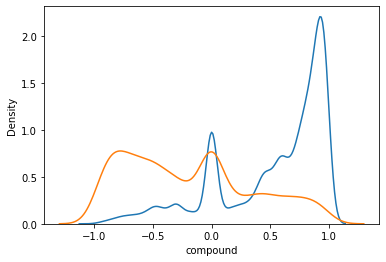

In [23]:
for x in [0, 1]:
    subset = review_data[review_data['is_bad'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

Something errors about most negative reviews: Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the hotel. Luckily, most of the reviews are bad ones.

In [24]:
label = "is_bad"
ignore_cols = [label, "review", "clean_reviews"]
features = [c for c in review_data.columns if c not in ignore_cols]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(review_data[features], review_data[label], test_size = 0.20, random_state = 42)

We first choose which features we want to use to train our model. Then we split our data into two parts:

    1)one to train our model
    2)one to assess its performances

We will next use a Random Forest (RF) classifier for our predictions.


In [25]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.042352
2,pos,0.023125
0,neg,0.021741
9,doc2vec_vector_3,0.021171
10,doc2vec_vector_4,0.019513
8,doc2vec_vector_2,0.018131
6,doc2vec_vector_0,0.018030
7,doc2vec_vector_1,0.017754
4,nb_chars,0.015721
1,neu,0.014893


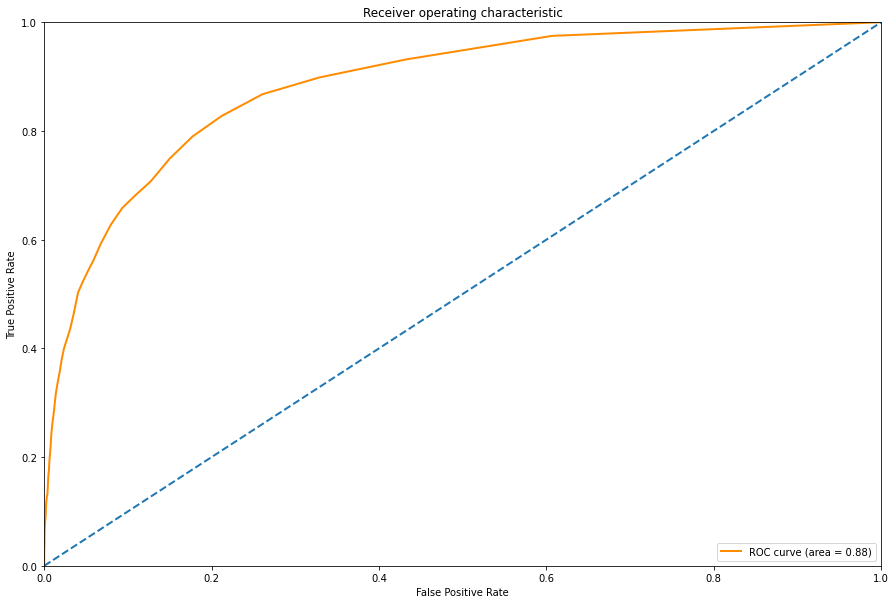

In [26]:
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Why? First let us remind the False Positive Rate formula, which corresponds to the x axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.37')

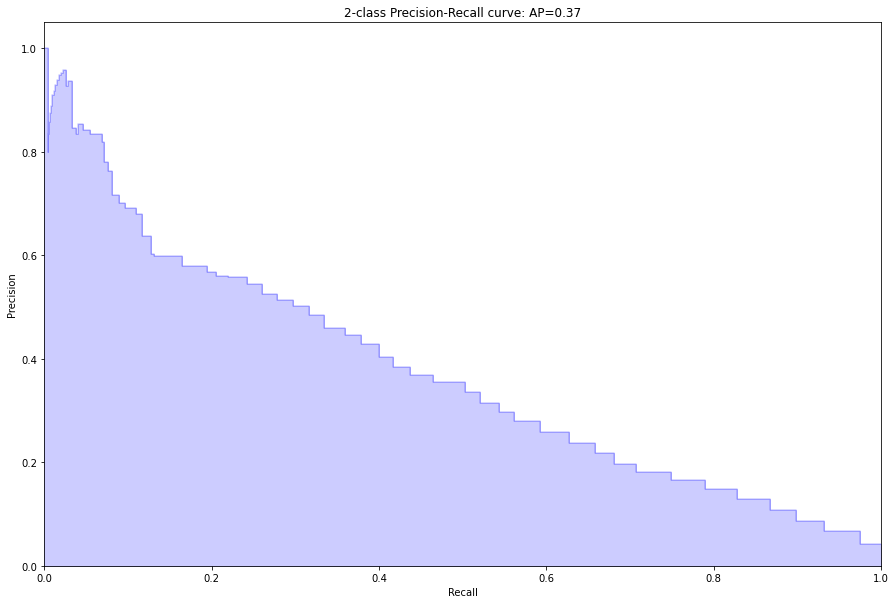

In [27]:


average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).

We can see that the precision decreases when we increase the recall. This shows us that we have to choose a prediction thresold adapted to our needs. If our goal is to have a high recall, we should set a low prediction thresold that will allow us to detect most of the observations of the positive class, but with a low precision. On the contrary, if we want to be really confident about our predictions but don't mind about not finding all the positive observations, we should set a high thresold that will get us a high precision and a low recall.

In order to know if our model performs better than another classifier, we can simply use the AP metric. To assess the quality of our model, we can compare it to a simple decision baseline. Let's take a random classifier as a baseline here that would predict half of the time 1 and half of the time 0 for the label.

Such a classifier would have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.35, which is more than 8 times higher than the AP of the random method. This means that our model has a good predictive power.


# Conclusion

In this project I've performed Sentiment Analysis which is a quintessential technique used to classify reviews. It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. 
